In [1]:
# Import findspark 
import findspark

# Or use this alternative
findspark.init()

In [2]:
# Import SparkSession
from pyspark.sql import SparkSession

# Build the SparkSession
spark = SparkSession.builder \
   .master("local") \
   .appName("Assignment 1") \
   .config("spark.executor.memory", "1gb") \
   .getOrCreate()
   
sc = spark.sparkContext
#sc.stop()

Answer : Part 1

1. Read comma separated file and load in to spark dataframe
2. Count the number of data points we have. Print the list of first 40 instances.

In [3]:
# Load in the data
rdd = sc.textFile('C:\\Users\\sures\\Downloads\\MSD.txt')

In [4]:
rdd.count()

515345

In [45]:
rdd.take(40)

[['year',
  'f1',
  'f2',
  'f3',
  'f4',
  'f5',
  'f6',
  'f7',
  'f8',
  'f9',
  'f10',
  'f11',
  'f12',
  'f13',
  'f14',
  'f15',
  'f16',
  'f17',
  'f18',
  'f19',
  'f20',
  'f21',
  'f22',
  'f23',
  'f24',
  'f25',
  'f26',
  'f27',
  'f28',
  'f29',
  'f30',
  'f31',
  'f32',
  'f33',
  'f34',
  'f35',
  'f36',
  'f37',
  'f38',
  'f39',
  'f40',
  'f41',
  'f42',
  'f43',
  'f44',
  'f45',
  'f46',
  'f47',
  'f48',
  'f49',
  'f50',
  'f51',
  'f52',
  'f53',
  'f54',
  'f55',
  'f56',
  'f57',
  'f58',
  'f59',
  'f60',
  'f61',
  'f62',
  'f63',
  'f64',
  'f65',
  'f66',
  'f67',
  'f68',
  'f69',
  'f70',
  'f71',
  'f72',
  'f73',
  'f74',
  'f75',
  'f76',
  'f77',
  'f78',
  'f79',
  'f80',
  'f81',
  'f82',
  'f83',
  'f84',
  'f85',
  'f86',
  'f87',
  'f88',
  'f89',
  'f90',
  '2001',
  '49.94357',
  '21.47114',
  '73.07750',
  '8.74861',
  '-17.40628',
  '-13.09905',
  '-25.01202',
  '-12.23257',
  '7.83089',
  '-2.46783',
  '3.32136',
  '-2.31521',
  '10.2055

In [5]:
# Split lines on commas
rdd = rdd.map(lambda line: line.split(","))

# Inspect the first 2 lines 
#rdd.take(2)

In [6]:
# Import the necessary modules 
from pyspark.sql import Row

# Map the RDD to a DF

df = rdd.map(lambda line: Row(year=line[0], 
                              f1=line[1], 
                              f2=line[2],
                              f3=line[3],
                              f4=line[4],
                              f5=line[5], 
                              f6=line[6],
                              f7=line[7],
                              f8=line[8],
                              f9=line[9], 
                              f10=line[10],
                              f11=line[11],
                              f12=line[12],
                              f13=line[13], 
                              f14=line[14],
                              f15=line[15],
                              f16=line[16],
                              f17=line[17], 
                              f18=line[18],
                              f19=line[19],
                              f20=line[20],
                              f21=line[21], 
                              f22=line[22],
                              f23=line[23],
                              f24=line[24],
                              f25=line[25], 
                              f26=line[26],
                              f27=line[27],
                              f28=line[28],
                              f29=line[29], 
                              f30=line[30],
                              f31=line[31],
                              f32=line[32],
                              f33=line[33],
                              f34=line[34],
                              f35=line[35],
                              f36=line[36], 
                              f37=line[37],
                              f38=line[38],
                              f39=line[39],
                              f40=line[40], 
                              f41=line[41],
                              f42=line[42],
                              f43=line[43],
                              f44=line[44], 
                              f45=line[45],
                              f46=line[46],
                              f47=line[47],
                              f48=line[48], 
                              f49=line[49],
                              f50=line[50],
                              f51=line[51],
                              f52=line[52], 
                              f53=line[53],
                              f54=line[54],
                              f55=line[55],
                              f56=line[56], 
                              f57=line[57],
                              f58=line[58],
                              f59=line[59],
                              f60=line[60], 
                              f61=line[61],
                              f62=line[62],
                              f63=line[63],
                              f64=line[64], 
                              f65=line[65],
                              f66=line[66],
                              f67=line[67],
                              f68=line[68], 
                              f69=line[69],
                              f70=line[70],
                              f71=line[71],
                              f72=line[72],
                              f73=line[73],
                              f74=line[74], 
                              f75=line[75],
                              f76=line[76],
                              f77=line[77],
                              f78=line[78], 
                              f79=line[79],
                              f80=line[80],
                              f81=line[81],
                              f82=line[82], 
                              f83=line[83],
                              f84=line[84],
                              f85=line[85],
                              f86=line[86], 
                              f87=line[87],
                              f88=line[88],
                              f89=line[89],f90=line[90])).toDF()


Part 3
In learning problem, its natural to shift labels if its not starting from zero. Find out the range of prediction year and shift labels if necessary so that lowest one starts from zero.

Answer: The "year" label is shifted to start from 0 by subtracting 1922

In [7]:
# Import all from `sql.functions` 
from pyspark.sql.functions import *

# Add the new columns to `df`
df = df.withColumn("year_adjusted", col("year")-1922)

In [46]:
# Check the top 2 rows 
df.show(2)

+-----+--------------------+
|label|            features|
+-----+--------------------+
| 79.0|[48.7321510314941...|
| 79.0|[50.9571418762207...|
+-----+--------------------+
only showing top 2 rows



In [47]:
# Print the data types of all `df` columns
# df.dtypes

# Print the schema of `df`
df.printSchema()

root
 |-- label: double (nullable = true)
 |-- features: vector (nullable = true)



In [8]:
# Import all from `sql.types`
from pyspark.sql.types import *

# Write a custom function to convert the data type of DataFrame columns
def convertColumn(df, names, newType):
  for name in names: 
     df = df.withColumn(name, df[name].cast(newType))
  return df 

# Assign all column names to `columns`
columns= [
  'f1',
  'f2',
  'f3',
  'f4',
  'f5',
  'f6',
  'f7',
  'f8',
  'f9',
  'f10',
  'f11',
  'f12',
  'f13',
  'f14',
  'f15',
  'f16',
  'f17',
  'f18',
  'f19',
  'f20',
  'f21',
  'f22',
  'f23',
  'f24',
  'f25',
  'f26',
  'f27',
  'f28',
  'f29',
  'f30',
  'f31',
  'f32',
  'f33',
  'f34',
  'f35',
  'f36',
  'f37',
  'f38',
  'f39',
  'f40',
  'f41',
  'f42',
  'f43',
  'f44',
  'f45',
  'f46',
  'f47',
  'f48',
  'f49',
  'f50',
  'f51',
  'f52',
  'f53',
  'f54',
  'f55',
  'f56',
  'f57',
  'f58',
  'f59',
  'f60',
  'f61',
  'f62',
  'f63',
  'f64',
  'f65',
  'f66',
  'f67',
  'f68',
  'f69',
  'f70',
  'f71',
  'f72',
  'f73',
  'f74',
  'f75',
  'f76',
  'f77',
  'f78',
  'f79',
  'f80',
  'f81',
  'f82',
  'f83',
  'f84',
  'f85',
  'f86',
  'f87',
  'f88',
  'f89',
  'f90', 'year', 'year_adjusted']
#columns = ['households', 'housingMedianAge', 'latitude', 'longitude', 'medianHouseValue', 'medianIncome', 'population', 'totalBedRooms', 'totalRooms']

# Conver the `df` columns to `FloatType()`
df = convertColumn(df, columns, FloatType())

In [9]:
#df.printSchema()
df = df.dropna()

In [10]:
# Checking the stats
df.describe().show()

+-------+-----------------+------------------+--------------------+-----------------+------------------+------------------+------------------+------------------+------------------+-----------------+-----------------+------------------+-----------------+------------------+-----------------+------------------+------------------+------------------+------------------+-------------------+-------------------+------------------+-----------------+------------------+-----------------+------------------+-----------------+-------------------+-------------------+------------------+------------------+-----------------+-------------------+------------------+------------------+-------------------+------------------+------------------+------------------+-------------------+------------------+------------------+-----------------+------------------+------------------+------------------+-----------------+-----------------+------------------+------------------+-------------------+-----------------+-------

Part 2
- Normalize features between 0 and 1. Normalization helps to converge machine learning algorithms faster

Answer: Normalized using MinMaxScaler

In [11]:
# Import `DenseVector`
from pyspark.ml.linalg import DenseVector

# Define the `input_data` 
input_data = df.rdd.map(lambda x: (x[91], DenseVector(x[0:89])))

# Replace `df` with the new DataFrame
df = spark.createDataFrame(input_data, ["label", "features"])

In [15]:
from pyspark.ml.feature import MinMaxScaler
from pyspark.ml.linalg import Vectors


scaler = MinMaxScaler(inputCol="features", outputCol="features_scaled")

# Compute summary statistics and generate MinMaxScalerModel
scalerModel = scaler.fit(df)

# rescale each feature to range [min, max].
scaled_df = scalerModel.transform(df)
#print("Features scaled to range: [%f, %f]" % (scaler.getMin(), scaler.getMax()))
#scaled_df.select("features", "features_scaled").show()

Part 4
- Split dataset into training, validation and test set.
 
 Answer: Data set split based on the recommendation on UCI ML site: Train set: first 563715, Test set:last 51,630

- Create a baseline model where we always provide the same prediction irrespective of our input. (Use training data)

Answer: see below


In [16]:
#from pyspark.sql.functions import monotonically_increasing_id

#scaled_data_indexed = scaled_df.withColumn("index", monotonically_increasing_id())
#scaled_data_indexed.head(3)
#train_data = scaled_data_indexed.filter("index = 463715")
#train_data = scaled_data_indexed.where(scaled_data_indexed.index == 463715).collect()
#train_data= scaled_data_indexed.filter(scaled_data_indexed.index <= 463715)
#test_data = scaled_data_indexed.filter("index > 463715")
#train_data.count()
#scaled_data_indexed.count()

In [17]:
train_data, test_data = scaled_df.randomSplit([.8,.2],seed=1234)

In [18]:
# Import `LinearRegression`
from pyspark.ml.regression import LinearRegression

# Initialize `lr`
lr = LinearRegression(labelCol="label", maxIter=10, regParam=0.3, elasticNetParam=0.8)

# Fit the data to the model
linearModel = lr.fit(train_data)

In [22]:
# Generate predictions
predicted = linearModel.transform(test_data)

# Extract the predictions and the "known" correct labels
predictions = predicted.select("prediction").rdd.map(lambda x: x[0])
labels = predicted.select("label").rdd.map(lambda x: x[0])

# Zip `predictions` and `labels` into a list
predictionAndLabel = predictions.zip(labels).collect()

# Print out first 10 instances of `predictionAndLabel` 
predictionAndLabel[:10]

[(69.73957479181371, 0.0),
 (74.17745265933237, 0.0),
 (72.56025784377024, 0.0),
 (62.4803178311122, 8.0),
 (74.55018282499363, 22.0),
 (71.42820120385393, 23.0),
 (76.02891507454973, 23.0),
 (69.64712483733564, 26.0),
 (75.40791999707218, 28.0),
 (72.3516760618163, 30.0)]

In [23]:
# Coefficients for the model
print(linearModel.coefficients)

# Intercept for the model
print(linearModel.intercept)

[0.674002692008253,0.0,-0.002238987346692875,-0.013389586915223375,0.022786132333410234,0.0002900766773547173,0.0,0.0004074005388982678,0.00033682396875506216,-0.0,0.0008664363598653226,-0.033318224758733056,0.003212052672128746,0.0,0.00011458265238970439,0.0035140068735140446,0.0,0.0,0.0,0.0002650372844533857,0.0,0.0,-0.03741325766702302,0.0,0.0,0.0,-0.00011267355046758048,0.0,0.0,-0.0020045441651496136,0.0,0.0008347709357527238,0.0006358422865258916,0.0,-0.0013922772294191524,-0.0028463505522779552,0.0,0.0,0.0,0.0,0.0,0.00016940085062650426,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0011345591086404628,7.454757622552108e-05,-0.0009295386474501867,-0.14859208780469602,0.0,0.0,0.0,0.0,9.371955626882876e-05,0.0,0.0,0.0,0.0,-0.0017289847435348026,0.0,0.0,0.0,0.0,0.0,0.0016887531984894,0.0016872764024754244,0.0,0.0,-0.0021851114162491805,0.0,0.0,0.0,0.0,0.0,0.0013786592579127929,0.0,0.01137098832178302,-0.00013209708129249218,0.0,0.0,0.0,-0.02528807760992994]
41.08295612429194


Part 4-

 - Implement a function to give Root mean square error given a RDD.
 

- Measure our performance of base model using it. (Use test data)

In [24]:
# Get the RMSE
print(linearModel.summary.rootMeanSquaredError)

# Get the R2
print(linearModel.summary.r2)

9.746831548142264
0.20601631406846532


Part 5
Visualize predicted vs actual using a scatter plot.

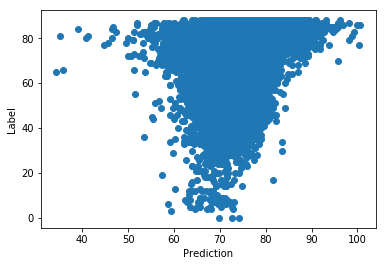

In [25]:
import matplotlib.pyplot as plt
plt.scatter(predictions.collect(), labels.collect())
plt.xlabel("Prediction")
plt.ylabel("Label")
plt.show()

In [48]:
spark.stop()